In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+164.ge460768.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 270
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [13]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    frontscan, backscan, groundscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy, sensorsground=sensorsground)
    ground, back = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan, backscan)
    print(ground)
    for i, x in enumerate(ground['x']):
        if x <= -1 and x >= -1*(pitch-1):
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Row2_Module10_Front
Linescan in process: groundscan2_Row2_Module10_Back
Saved: results/irr_groundscan2_Row2_Module10.csv
{'Wm2': [18.269, 18.41101], 'x': [0.0, -5.7], 'y': [0.0, -1.047073e-15], 'z': [0.05, 0.05], 'r': [18.269, 18.41101], 'g': [18.269, 18.41101], 'b': [18.269, 18.41101], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Row2_Module10_Front'}

sensorsground: 3
Linescan in process: groundscan3_Row2_Module10_Front


/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/storopov/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Linescan in process: groundscan3_Row2_Module10_Back
Saved: results/irr_groundscan3_Row2_Module10_Front.csv
Saved: results/irr_groundscan3_Row2_Module10_Back.csv
{'Wm2': [18.36743, 959.2113, 18.56102], 'x': [0.0, -2.85, -5.7], 'y': [0.0, -5.235365e-16, -1.047073e-15], 'z': [0.05, 0.05, 0.05], 'r': [18.36743, 959.2113, 18.56102], 'g': [18.36743, 959.2113, 18.56102], 'b': [18.36743, 959.2113, 18.56102], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Row2_Module10_Front'}

sensorsground: 5
Linescan in process: groundscan5_Row2_Module10_Front
Linescan in process: groundscan5_Row2_Module10_Back
Saved: results/irr_groundscan5_Row2_Module10_Front.csv
Saved: results/irr_groundscan5_Row2_Module10_Back.csv
{'Wm2': [18.33637, 958.5591, 959.1093999999999, 954.7796, 18.53815], 'x': [0.0, -1.425, -2.85, -4.275, -5.7], 'y': [0.0, -2.617683e-16, -5.235365e-16, -7.853048e-16, -1.047073e-15], 'z': [0.05, 0.05, 0.05, 0.05, 0.05], 'r': [18.33637, 958.5591, 959.1094, 954.779

Linescan in process: groundscan150_Row2_Module10_Back
Saved: results/irr_groundscan150_Row2_Module10_Front.csv
Saved: results/irr_groundscan150_Row2_Module10_Back.csv
{'Wm2': [18.59996, 17.89943, 17.19889, 17.05723, 17.12887, 17.20051, 18.868, 19.78903, 20.71007, 27.08935, 28.38988, 29.69042, 54.14856, 56.79999, 862.3299000000001, 913.6523000000001, 918.9099, 924.1673999999999, 940.8698, 944.4928999999998, 948.116, 950.4524, 951.5279999999999, 952.6036, 953.6793000000001, 955.0167, 955.0805999999999, 955.1447, 955.2086, 955.2725999999999, 955.3365, 955.4006, 958.6006000000001, 958.6619, 958.7231, 958.7844, 958.8456, 958.9068000000001, 958.968, 959.0293, 959.0904999999999, 959.1517, 959.4747000000001, 959.4785, 959.4823, 959.4861999999999, 959.4900000000001, 959.4937999999999, 959.4977, 959.5015, 959.5054, 959.5092, 959.5131, 959.5168, 959.5207, 959.5245, 959.5284, 959.4757, 959.4768, 959.478, 959.4791, 959.4802, 959.4813, 959.4824, 959.4834999999999, 959.4846000000001, 959.485699999999

Linescan in process: groundscan200_Row2_Module10_Back
Saved: results/irr_groundscan200_Row2_Module10_Front.csv
Saved: results/irr_groundscan200_Row2_Module10_Back.csv
{'Wm2': [18.44153, 17.80381, 17.1661, 17.34126, 17.3576, 17.37393, 17.95064, 18.4636, 18.97656, 20.22939, 20.91165, 21.593910000000005, 27.579629999999998, 28.58843, 29.59723, 43.60249000000001, 45.17618000000001, 46.74988, 80.12287, 885.938, 888.8746, 923.0904, 927.2581, 931.4258, 940.6367, 943.4768, 946.317, 949.1571, 949.9861, 950.9258, 951.8655, 952.8052000000001, 953.7449, 954.6846, 955.3719, 955.4921, 955.6124, 955.7327, 955.8529, 955.9731, 956.0934000000001, 956.2136999999999, 956.3339, 956.4542, 956.5745000000001, 956.6947, 956.8149, 956.9352, 957.0555, 959.1754999999999, 959.1792, 959.183, 959.1866999999999, 959.1904, 959.1942, 959.1979, 959.2017, 959.2054000000002, 959.2091, 959.2129, 959.2166000000001, 959.2203, 959.2241, 959.2278, 959.2316, 959.2354, 959.239, 959.2428, 959.2464999999999, 959.4276999999998, 959

Linescan in process: groundscan250_Row2_Module10_Back
Saved: results/irr_groundscan250_Row2_Module10_Front.csv
Saved: results/irr_groundscan250_Row2_Module10_Back.csv
{'Wm2': [18.68379, 18.22932, 17.77486, 17.32039, 17.30876, 17.21968, 17.13059, 17.04151, 16.95243, 18.74275, 19.26469, 19.78664, 20.30859, 22.87476, 23.54501, 24.21527, 24.88552, 34.07284, 35.04653, 36.02023, 36.99392, 62.4976, 64.32862, 66.15965, 870.8691, 912.8530999999999, 915.9088, 918.9644, 922.02, 937.3325, 940.6435, 943.9545000000002, 947.2655, 947.0703, 948.2075, 949.3446, 950.4818, 951.619, 952.9064, 953.2544000000001, 953.6024000000001, 953.9504000000001, 954.2983, 954.6464, 954.9943, 956.9573999999999, 957.0213, 957.0853000000001, 957.1492, 957.2131, 957.2770999999999, 957.3411, 957.4050000000001, 957.4689, 957.5329, 957.5969, 957.6608, 957.7247000000001, 959.2716999999999, 959.2883, 959.3049, 959.3215, 959.3381, 959.3548, 959.3714, 959.3881, 959.4047, 959.4213, 959.4379, 959.4545000000002, 959.4711000000001, 9

Linescan in process: groundscan300_Row2_Module10_Back
Saved: results/irr_groundscan300_Row2_Module10_Front.csv
Saved: results/irr_groundscan300_Row2_Module10_Back.csv
{'Wm2': [18.25674, 17.9172, 17.57767, 17.23813, 16.89859, 17.55082, 17.45463, 17.35843, 17.26223, 17.16603, 17.06984, 18.63284, 19.03884, 19.44483, 19.85083, 20.25683, 23.68225, 24.25348, 24.82472, 25.39595, 25.96718, 36.18299, 37.04797, 37.91295, 38.77793, 39.64291, 69.61961, 71.31815, 875.8951000000001, 877.5937, 879.2922, 919.4320000000001, 922.0823, 924.7325999999999, 927.3829, 930.0333, 939.8738, 941.6283, 943.3828, 945.1373, 946.8918, 948.6464, 950.1713, 950.7086, 951.246, 951.7833, 952.3206999999999, 952.8579999999998, 953.3953, 954.5562, 954.6439999999999, 954.7316999999999, 954.8195, 954.9072, 954.995, 955.0828, 955.1704999999998, 955.2583, 955.3461000000001, 955.4338000000001, 955.5216, 955.6093999999999, 958.424, 958.4634, 958.5027, 958.5421, 958.5814999999999, 958.621, 958.6603, 958.6997, 958.7391000000001, 95

Linescan in process: groundscan400_Row2_Module10_Back
Saved: results/irr_groundscan400_Row2_Module10_Front.csv
Saved: results/irr_groundscan400_Row2_Module10_Back.csv
{'Wm2': [18.36451, 18.07213, 17.77975, 17.48738, 17.195, 16.90262, 16.72408, 16.74035, 16.75663, 16.77291, 16.78918, 16.80546, 17.60065, 17.8201, 18.03955, 18.259, 18.47846, 18.69791, 18.91736, 21.46883, 21.85996, 22.25108, 22.6422, 23.033329999999996, 23.424449999999997, 29.05565, 29.58454, 30.11344, 30.64233, 31.17122, 31.70011, 47.92204999999999, 48.79724000000001, 49.67244, 50.54763, 51.42282, 52.29802, 890.8894999999999, 892.4987, 894.1078000000001, 895.717, 897.3262, 898.9354, 926.7890000000001, 929.0515, 931.314, 933.5765, 935.839, 938.1015000000001, 942.0903, 943.3651, 944.6399, 945.9146999999999, 947.1895, 948.4643, 949.739, 949.9706, 950.3260999999999, 950.6816, 951.0369999999999, 951.3925, 951.7479, 952.1034, 952.4589, 952.8143, 953.1698, 954.8499, 954.9222, 954.9946999999999, 955.0670999999999, 955.13949999999

Linescan in process: groundscan500_Row2_Module10_Back
Saved: results/irr_groundscan500_Row2_Module10_Front.csv
Saved: results/irr_groundscan500_Row2_Module10_Back.csv
{'Wm2': [18.42513, 18.21999, 18.01484, 17.80969, 17.60455, 17.39939, 17.19425, 16.9891, 17.74218, 17.72204, 17.70189, 17.68174, 17.66159, 17.64144, 17.62129, 17.60114, 18.19882, 18.43703, 18.67525, 18.91346, 19.15168, 19.38989, 19.62811, 20.50856, 20.79733, 21.08609, 21.37485, 21.663609999999995, 21.95238, 22.24114, 22.5299, 28.60003, 29.01499, 29.42995, 29.84491, 30.259869999999996, 30.67482, 31.08978, 45.28958, 45.94154, 46.59351, 47.24548000000001, 47.897439999999996, 48.5494, 49.20137, 80.16858, 81.34054, 885.391, 886.5629, 887.7349, 888.9069, 890.0787999999999, 920.9748, 922.6758, 924.3768999999999, 926.078, 927.7791000000001, 929.4801000000001, 931.1812, 938.5771, 939.8515000000001, 941.1259, 942.4001, 943.6744, 944.9488, 946.2231, 947.4973999999999, 948.7716999999999, 948.8579, 949.2719000000001, 949.6857, 950.0997

In [14]:
results

[nan,
 332.04658333333333,
 581.8645240000001,
 764.212362,
 767.2370925,
 768.6081346666667,
 787.3426749999999,
 793.1082304666668,
 791.7596956499998,
 791.1974110799999,
 793.3180166,
 796.0686761499999,
 794.71589974]

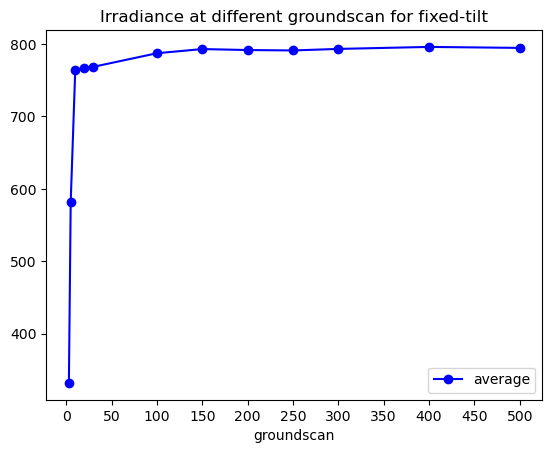

In [15]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()